In [16]:
# Include libraries which may use in implementation
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
import numpy as np
import matplotlib.pyplot as plt

class Neural_Network(object):
    """
    A simple implementation of a feedforward neural network.

    Attributes:
        inputSize (int): Number of input features.
        outputSize (int): Number of output nodes.
        W1 (numpy.ndarray): Weight matrix connecting input to output layer.
    """

    def __init__(self, inputSize=2, outputSize=1):
        """
        Initializes the neural network.

        Args:
            inputSize (int, optional): Number of input features. Defaults to 2.
            outputSize (int, optional): Number of output nodes. Defaults to 1.
        """
        self.inputSize = inputSize
        self.outputSize = outputSize
        self.W1 = np.random.rand(self.inputSize, self.outputSize)

    def feedforward(self, X):
        """
        Performs a forward pass through the network and computes the output.

        Args:
            X (numpy.ndarray): Input data.

        Returns:
            numpy.ndarray: Output of the neural network.
        """
        self.z = np.dot(X, self.W1)
        self.output = self.sigmoid(self.z)
        return self.output

    def sigmoid(self, s):
        """
        Applies the sigmoid activation function.

        Args:
            s (numpy.ndarray): Input data.

        Returns:
            numpy.ndarray: Output after applying the sigmoid function.
        """
        return 1 / (1 + np.exp(-s))

    def sigmoid_derivative(self, s):
        """
        Computes the derivative of the sigmoid function.

        Args:
            s (numpy.ndarray): Input data.

        Returns:
            numpy.ndarray: Derivative of the sigmoid function.
        """
        return s * (1 - s)

    def backwardpropagate(self, X, Y, y_pred, lr):
        """
        Performs backward propagation to update weights.

        Args:
            X (numpy.ndarray): Input data.
            Y (numpy.ndarray): True labels.
            y_pred (numpy.ndarray): Predicted labels.
            lr (float): Learning rate for weight update.
        """
        self.error = self.crossentropy(Y, y_pred)
        self.delta = self.error * self.sigmoid_derivative(y_pred)
        self.W1 -= lr * np.dot(X.T, self.delta)

    def crossentropy(self, Y, Y_pred):
        """
        Computes the cross-entropy loss.

        Args:
            Y (numpy.ndarray): True labels.
            Y_pred (numpy.ndarray): Predicted labels.

        Returns:
            numpy.ndarray: Cross-entropy error.
        """
        epsilon = 1e-15
        Y_pred = np.clip(Y_pred, epsilon, 1 - epsilon)
        error = -(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))
        return error

    def train(self, trainX, trainY, epochs=100, learningRate=0.001, plot_err=True, validationX=None, validationY=None):
        """
        Trains the neural network.

        Args:
            trainX (numpy.ndarray): Training input data.
            trainY (numpy.ndarray): Training true labels.
            epochs (int, optional): Number of training epochs. Defaults to 100.
            learningRate (float, optional): Learning rate for weight update. Defaults to 0.001.
            plot_err (bool, optional): Whether to plot the training and validation loss. Defaults to True.
            validationX (numpy.ndarray, optional): Validation input data. Defaults to None.
            validationY (numpy.ndarray, optional): Validation true labels. Defaults to None.
        """
        self.train_loss = []
        self.validation_loss = []

        for epoch in range(epochs):
            y_pred = self.feedforward(trainX)
            self.backwardpropagate(trainX, trainY, y_pred, learningRate)
            epoch_loss = np.mean(self.error)
            self.train_loss.append(epoch_loss)

            if validationX is not None and validationY is not None:
                validation_pred = self.feedforward(validationX)
                validation_loss = np.mean(self.crossentropy(validationY, validation_pred))
                self.validation_loss.append(validation_loss)

        if plot_err:
            plt.plot(range(epochs), self.train_loss, label='Training Loss')
            if validationX is not None and validationY is not None:
                plt.plot(range(epochs), self.validation_loss, label='Validation Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()
            plt.show()

    def predict(self, testX):
        """
        Predicts the output for test data.

        Args:
            testX (numpy.ndarray): Test input data.

        Returns:
            numpy.ndarray: Predicted output.
        """
        return self.feedforward(testX)

    def accuracy(self, testX, testY):
        """
        Computes the accuracy of the neural network on test data.

        Args:
            testX (numpy.ndarray): Test input data.
            testY (numpy.ndarray): Test true labels.

        Returns:
            float: Accuracy of the model.
        """
        y_pred = self.feedforward(testX)
        y_pred_class = (y_pred >= 0.5).astype(int)
        accuracy = np.mean(y_pred_class == testY)
        return accuracy

    def saveModel(self, name):
        """
        Saves the trained model to a file.

        Args:
            name (str): File name to save the model.
        """
        np.save(name, self.W1)

    def loadModel(self, name):
        """
        Loads a trained model from a file.

        Args:
            name (str): File name to load the model from.
        """
        self.W1 = np.load(name)


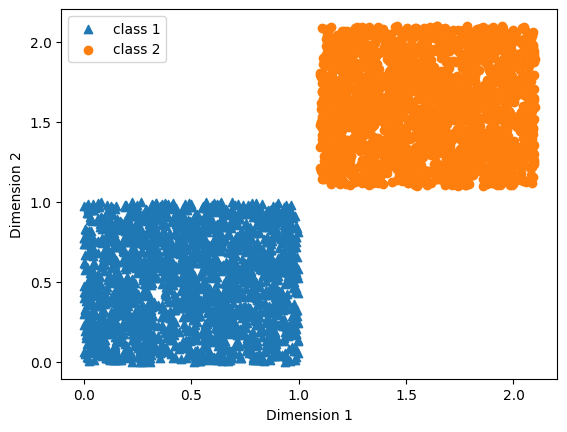

In [18]:
# generating dataset point
np.random.seed(1)
no_of_samples = 2000
dims = 2
#Generating random points of values between 0 to 1
class1=np.random.rand(no_of_samples,dims)
#To add separability we will add a bias of 1.1
class2=np.random.rand(no_of_samples,dims)+1.1
class_1_label=np.array([1 for n in range(no_of_samples)])
class_2_label=np.array([0 for n in range(no_of_samples)])
#Lets visualize the dataset
plt.scatter(class1[:,0],class1[:,1], marker='^', label="class 1")
plt.scatter(class2[:,0],class2[:,1], marker='o', label="class 2")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='best')
plt.show()

In [19]:
# Data concatenation
data = np.concatenate((class1,class2),axis=0)
label = np.concatenate((class_1_label,class_2_label),axis=0)
"""
Split the data and labels into training, validation, and testing sets.

Parameters:
    data (numpy.ndarray): The input data to be split.
    label (numpy.ndarray): The corresponding labels.
    train_ratio (float): The proportion of data for training.
    valid_ratio (float): The proportion of data for validation.

Returns:
    tuple: A tuple containing trainX, trainY, validX, validY, testX, testY arrays.
"""
#Note: shuffle this dataset before dividing it into three parts
shuffled_indices = np.arange(data.shape[0])
np.random.shuffle(shuffled_indices)

train_ratio = 0.7
valid_ratio = 0.15
test_ratio = 0.15

num_examples = shuffled_indices.shape[0]
num_train = int(train_ratio * num_examples)
num_valid = int(valid_ratio * num_examples)

shuffled_data = data[shuffled_indices]
shuffled_label = label[shuffled_indices]
# Distribute this data into three parts i.e. training, validation and testing
trainX = data[shuffled_indices[:num_train]]# training data point
trainY = label[shuffled_indices[:num_train]]# training lables

validX = shuffled_data[num_train:num_train + num_valid] # validation data point
validY = shuffled_label[num_train:num_train + num_valid]# validation lables

testX = data[shuffled_indices[num_train + num_valid:]]# testing data point
testY = label[shuffled_indices[num_train + num_valid:]]# testing lables

trainY = trainY.reshape(-1, 1)
validY = validY.reshape(-1, 1)


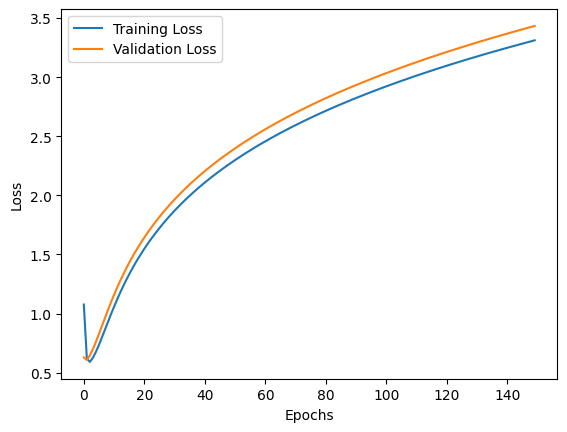

In [20]:
model = Neural_Network(2,1)
# try different combinations of epochs and learning rate
model.train(trainX, trainY, epochs = 150, learningRate = 0.001, validationX = validX, validationY = validY)

In [21]:
#save the best model which you have trained, 
model.saveModel('bestmodel.mdl')

#### Note: This below section will be used for the evaluation of this task, we need your model and we will run script below to evaluated your model

In [22]:
# create class object
mm = Neural_Network()
# load model which will be provided by you
mm.loadModel('bestmodel.mdl')
# check accuracy of that model
mm.accuracy(testX,testY)




0.5233333333333333